In [2]:
#initial working, still need to calculat energy consumed with extara item inside 
#on time and off time  and door open loss, energy consumed per day  is done 
import time
import psutil
import matplotlib.pyplot as plt
import keyboard 

<IPython.core.display.Javascript object>


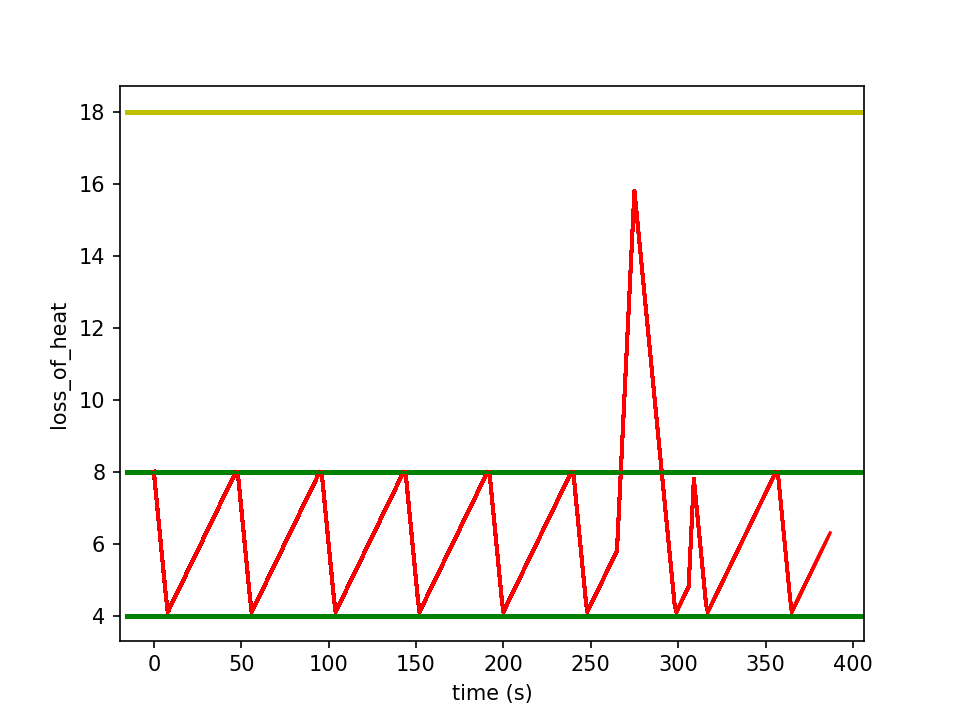

In [3]:
%matplotlib notebook
plt.rcParams['animation.html']= 'jshtml'
fig= plt.figure()
ax=fig.add_subplot(1,1,1)


#bx=fig.add_subplot(1,1,2)
fig.show ()
rtemp=18

tmin=4 
tmain=6
tmax=8
#Z=(room temperature - main temperature)


In [4]:
i=0

p=""
on_time=0
off_time=0 
door_open_t=0

a=tmax
b=tmax
c=1
x,y,z=[],[],[] 
while True: 
    x.append(i)
    y.append(a) 
    z.append(b)
    if(c==1):
        ax.plot(x,y,color='b')
    else:
        ax.plot(x,z,color='r')
    
    ax.axhline(tmax, xmin=0.01, xmax=2,color='g',label='temp_max')
    ax.axhline(tmin, xmin=0.01, xmax=2,color='g',label='temp _min')
    ax.axhline(rtemp, xmin=0.01, xmax=1.9,color='y',label='room_temp')
    

    plt.xlabel("time (s)")
   # plt.xlabel(            on_time)
    plt.ylabel(p)
    #ax.legend(loc='upper left',frameon=False)
    fig.canvas.draw()

    #ax.set_xlim(left=max(0,i-500),right=i+50)
    time.sleep(0.1)
    i += 1  
    #print("on time of =",on_time "off time ="off_time)
     
    if keyboard.is_pressed('o'):
        p="door_opn loss"
        #print("door open")
        if(c==1)or(c==0):
            
            if(b<=rtemp) or(b<=tmax):
                        b+=1.5
                        a+=1.5
                        c=1
                       # print("loss of tem by opening door ")
                        p="door_opn loss"
                        door_open_t+=1
                        if (b>=rtemp) and (a>=rtemp):
                            a=rtemp
                            b=rtemp
                            c=1
                            

                
    
    if(c==1):
        if (b>=tmin)or(b<=rtemp):
            a-=0.5
            b-=0.5
            p="cooling"
            on_time+=1
            if (a<=tmin) and (b <=tmin):
                a=tmin
                b=tmin
                c=0
                
                
    if(c==0):
          if(b<=tmax):
                b+=0.1
                a+=0.1
                p= "loss_of_heat" 
                off_time+=1
                if (b>=tmax) and (a>=tmax):
                    a=tmax
                    b=tmax
                    c=1

KeyboardInterrupt: 

In [6]:
#considering 600W of fridge operating power
# considering 1 Watt=1 Joul per second
W=600
print("on time of the fridge is (s)",on_time)
print("energy loss time of the fridge is (s)",off_time)
print("Door open time is (s)",door_open_t)
p_in_jsec=600*on_time
p=p_in_jsec/(3600000)
total_second=on_time+off_time
print("energy consumed till now in KWh is=",p)
lp=(door_open_t*600)/3600000
print("energy lost due to opening of door  till now in KWh is=",lp)
r_sec=86400-total_second
d_p= p+((r_sec/2)*600)/3600000
print("energy consumed in same manner for a day is=",d_p)


on time of the fridge is (s) 101
energy loss time of the fridge is (s) 295
Door open time is (s) 13
energy consumed till now in KWh is= 0.016833333333333332
energy lost due to opening of door  till now in KWh is= 0.0021666666666666666
energy consumed in same manner for a day is= 7.183833333333333


In [8]:
cp=4180 # considering  specific heat of water = 4180
 #z= rtemp-tmain # change in temp from room temp to main temp
m=2 #m is the mass of the food in kg 
#considering change in thermal energy =mass*specific heat capacity *(change in temperature)
# considering 1 Watt=1 Joul per second
D_t=12
# and the refrigerator consumes 600W

E= m*cp*D_t
print("change in thermal energy of the product in joules =",E)
e_s=E/600
print("Extra time required to cool this item is",e_s)
print("Extra power required to cool this item in above scenario ")


change in thermal energy of the product in joules = 100320
Extra time required to cool this item is 167.2
Extra power required to cool this item in above scenario 
